<a href="https://www.kaggle.com/gomohit/car-priceprediction-using-random-forest?scriptVersionId=85944728" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price/CarPrice_Assignment.csv


# Introduction
----------------------------------------------------

1. MPG or miles per gallon : It is the distance, measured in miles, that a car can travel per gallon of fuel 
    
2. City MPG: the score a car will get on average in city conditions, with stopping and starting at lower speeds.
3. wheelbase : wheelbase of any vehicle is the distance between the centre of the front wheels and the centre of the rear wheels.
        
    1.Cars with long wheelbases tend to have better ride quality than those with short wheelbases. 
    
    2.This is simply because there's more time between the front and rear wheels hitting any bumps, so the car is less likely to become unsettled
    
    3.Short wheelbase cars are better for nipping around town and more fun on twisty roads
    
    
4. Highway MPG: the average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.
    
5. compression ratio A higher compression ratio (CR) is beneficial for engines. That's because the higher ratio allows for an engine to extract more energy from the combustion process due to better thermal efficiency
    
6. Horsepower (hp) : Horsepower (hp) is the metric used to indicate the power produced by a car's engine - the higher the number, the more power is sent to the wheels and, in theory, the faster it will go

### Imoprting Major Library
___________________________________

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import missingno as msno
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
#importing libraries
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [3]:
import joblib
import squarify # pip install squarify

#### Reading a file
_______________________________

In [7]:
car = pd.read_csv("/kaggle/input/car-price/CarPrice_Assignment.csv")

Separation of testing ang prediction features
---------------------------------

In [ ]:
X = car.drop("price",1)   #Feature Matrix
y = car["price"]          #Target Variable

Viewing File 
---------------------

In [ ]:
car.head()

In [ ]:
car.tail()

In [9]:
bike=car.copy(deep=True)

Imoprtant Schema
-----------------------

In [10]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
car.info()

Droping Unnecessary Column
------------------------------

In [ ]:
car=car.drop(['car_ID','symboling'],axis=1)

Important Statistical Parameter of numerical Varriable
-----------------------------------------

In [ ]:
car.describe()

Checking null Values
----------------------------

In [ ]:
car.isnull().sum()

Observation

--------

There is no null value present.

Overall Distubution of diiferent varriable in Dataset
--------------------------

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
car.hist(ax = ax)

### Observation
-----------------------------------
    
| Normal Distribution | Skewed Distribution |
| :-------------------: | :-------------------: |
| 1.highwaymg | price |
|2.carlength|compress ratio |
|3.carwidth|horsepower|
|4.boreratio|wheelbase|
|5.carheight|citympg|
|6.cubeweight|enginesize|
|7.stroke| 

Univariate Analysis
----------------------------------------------------------

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,6))
plt.suptitle('DISTRIBUTION PLOTS')
# Histogram Plot for distribution and skewness
sns.histplot(car['compressionratio'], kde=True, color='red', bins=30,ax=ax[0]) #compress ratio
plt.title('compress ratio Distribution', fontsize=18)
plt.xlabel('compress ratio', fontsize=16)
plt.ylabel('Count', fontsize=16)

sns.histplot(car['horsepower'], kde=True, color='green', bins=30,ax=ax[1]) #horsepower
plt.title('horsepower', fontsize=18)
plt.xlabel('horsepower', fontsize=16)
plt.ylabel('Count', fontsize=16)

sns.histplot(car['highwaympg'], kde=True, color='blue', bins=10,ax=ax[2])#highwaympg
plt.title('highwaympg', fontsize=18)
plt.xlabel('highwaympg', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Box Plot for 5-point summary , distribution and outliers

fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('BOX PLOTS')

sns.boxplot(data = car ,y=car['compressionratio'], color='red',ax=ax[0]) #compress ratio
plt.title('compress ratio box_Plot', fontsize=18)
plt.ylabel('compress ratio', fontsize=16)

sns.boxplot(data = car ,y=car['horsepower'], color='green',ax=ax[1]) #Credit amount 
plt.title('horsepower box_Plot', fontsize=18)
plt.ylabel('horsepower', fontsize=16)

sns.boxplot(data = car ,y=car['highwaympg'], color='blue',ax=ax[2]) #highwaympg
plt.title('highwaympg box_Plot', fontsize=18)
plt.ylabel('highwaympg', fontsize=16)

### Observation
-----------------------------------
    
1. compress ration and horsepwer are righlty skewed and lot of outliers are present.
2. highwaympg are normal distributed with outliers

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,6))
plt.suptitle('DISTRIBUTION PLOTS')
# Histogram Plot for distribution and skewness
sns.histplot(car['citympg'], kde=True, color='red', bins=10,ax=ax[0]) #citympg
plt.title('citympg ratio Distribution', fontsize=18)
plt.xlabel('citympg', fontsize=16)
plt.ylabel('Count', fontsize=16)

sns.histplot(car['wheelbase'], kde=True, color='green', bins=50,ax=ax[1]) #wheelbase
plt.title('wheelbase', fontsize=18)
plt.xlabel('wheelbase', fontsize=16)
plt.ylabel('Count', fontsize=16)

sns.histplot(car['enginesize'], kde=True, color='blue', bins=50,ax=ax[2])#enginesize
plt.title('enginesize', fontsize=18)
plt.xlabel('enginesize', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Box Plot for 5-point summary , distribution and outliers

fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('BOX PLOTS')

sns.boxplot(data = car ,y=car['citympg'], color='red',ax=ax[0]) #compress ratio
plt.title('citympg box_Plot', fontsize=18)
plt.ylabel('citympg', fontsize=16)

sns.boxplot(data = car ,y=car['wheelbase'], color='green',ax=ax[1]) #Credit amount 
plt.title('wheelbase box_Plot', fontsize=18)
plt.ylabel('wheelbase', fontsize=16)

sns.boxplot(data = car ,y=car['enginesize'], color='blue',ax=ax[2]) #Duration
plt.title('enginesize box_Plot', fontsize=18)
plt.ylabel('enginesize', fontsize=16)

### Observation
-----------------------------------
    
1. city mpg ,wheel base and engiesize are righlty skewed and lot of outliers are present.
2. highwaympg are normal distributed with outliers

## Categorical Columns
--------------------------


In [ ]:
car.nunique()

In [ ]:
fig, ax = plt.subplots(figsize=(40,30), nrows=3, ncols=3)
sns.countplot(data=car, x="fueltype", ax=ax[0,0])
sns.countplot(data=car, x="aspiration", ax=ax[0,1])
sns.countplot(data=car, x="doornumber", ax=ax[0,2])
sns.countplot(data=car, x="carbody", ax=ax[1,0])
sns.countplot(data=car, x="drivewheel", ax=ax[1,1])
sns.countplot(data=car, x="enginelocation", ax=ax[2,1])
sns.countplot(data=car, x="enginetype", ax=ax[2,0])
sns.countplot(data=car, x="cylindernumber", ax=ax[1,2])
sns.countplot(data=car, x="fuelsystem", ax=ax[2,2])

### Observation
-----------------------------------
    
1. ohc engine type is dominating.
    
2. sedan and hatch back are domnating in car body type.
    
3. gas is more popular fuel type.
    
4. front engine location is dominating one.
    
5. mpfi and 2bbl is most popular fuel type.
    
6. four cylinder number is more popular.
    
7. people ususlly prefer number of door four.
    
8. people ususlly prefer fwd and rwd drive wheel.
    
9. std dominating in aspiration.

Car Models
----------------


In [ ]:
car.CarName

In [ ]:
car['model'] = car['CarName'].str.split(' ').str[0]

In [ ]:
car.model

In [ ]:
car.head()

In [ ]:
fig = plt.figure(figsize = (35,10))
car['model'].hist()

In [ ]:
plt.figure(figsize=(30, 10))
sizes = car['model'].value_counts()
squarify.plot(sizes=sizes, label=car['model'], alpha=0.6)
plt.title('Cars Model', fontsize=18)
plt.axis('off')
plt.show()

In [ ]:
fig= plt.subplots(figsize=(10,20))
sns.countplot(data=car, y="model",order = car['model'].value_counts().index)

### Observation
-----------------------------------
    
1. Syntex error in name of model
    
2. Result into duplication of category.
    
3. Toyoto is leader.

Feature Selection Using Filter Method
-------------------------------------------


In [ ]:
corr = car.corr(method = 'spearman')#without target varriable
fig= plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot = True)

plt.show()

### Observation
-----------------------------------
    
1. Correlation with spearmen method(skewwed dataset)
    

In [ ]:
#Correlation with output variable
cor_target = abs(corr["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

### Observation
-----------------------------------
    
As we can see, only the features horsepower, highwaympg ,citympg ,wheelbase , enginesize ,carwidth ,carlength  and boreratio are highly correlated with the output variable price . Hence we can  drop all other features apart from these.

In [ ]:
print(car[["horsepower","highwaympg"]].corr(method = 'spearman'))
print(car[["horsepower","citympg"]].corr(method = 'spearman'))
print(car[["horsepower","boreratio"]].corr(method = 'spearman'))
print(car[["horsepower","enginesize"]].corr(method = 'spearman'))
print(car[["horsepower","curbweight"]].corr(method = 'spearman'))
print(car[["horsepower","wheelbase"]].corr(method = 'spearman'))
print(car[["highwaympg","citympg"]].corr(method = 'spearman'))
print(car[["highwaympg","boreratio"]].corr(method = 'spearman'))
print(car[["highwaympg","enginesize"]].corr(method = 'spearman'))
print(car[["highwaympg","curbweight"]].corr(method = 'spearman'))
print(car[["highwaympg","wheelbase"]].corr(method = 'spearman'))
print(car[["curbweight","highwaympg"]].corr(method = 'spearman'))
print(car[["curbweight","citympg"]].corr(method = 'spearman'))
print(car[["curbweight","boreratio"]].corr(method = 'spearman'))
print(car[["curbweight","enginesize"]].corr(method = 'spearman'))
print(car[["boreratio","citympg"]].corr(method = 'spearman'))
print(car[["boreratio","wheelbase"]].corr(method = 'spearman'))
print(car[["boreratio","enginesize"]].corr(method = 'spearman'))
print(car[["enginesize","citympg"]].corr(method = 'spearman'))
print(car[["enginesize","wheelbase"]].corr(method = 'spearman'))
print(car[["boreratio","enginesize"]].corr(method = 'spearman'))
print(car[["horsepower","carlength"]].corr(method = 'spearman'))
print(car[["horsepower","carwidth"]].corr(method = 'spearman'))
print(car[["boreratio","carlength"]].corr(method = 'spearman'))
print(car[["boreratio","carwidth"]].corr(method = 'spearman'))
print(car[["wheelbase","carlength"]].corr(method = 'spearman'))
print(car[["wheelbase","carwidth"]].corr(method = 'spearman'))
print(car[["carlength","carwidth"]].corr(method = 'spearman'))

### Observation
-----------------------------------
    Thsee varriable are least correalated with each other.

1. Horsepower
2. borreto
3. wheelbase
4. carwidth

In [ ]:
car.nunique()

Multivariate Analysis
------------------------------------

In [ ]:
fig, ax = plt.subplots(figsize=(20,10), nrows=2, ncols=2)
sns.scatterplot(data=car, x="horsepower",y=y, ax=ax[0,0])
sns.scatterplot(data=car, x="boreratio",y=y, ax=ax[0,1])
sns.scatterplot(data=car, x="wheelbase",y=y, ax=ax[1,1])
sns.scatterplot(data=car, x="carwidth",y=y, ax=ax[1,0])

In [ ]:
fig, ax = plt.subplots(figsize=(20,10),nrows=2,ncols=3)
sns.scatterplot(data=car, x="horsepower",y="boreratio", ax=ax[0,0])
sns.scatterplot(data=car, x="boreratio",y="wheelbase", ax=ax[0,1])
sns.scatterplot(data=car, x="wheelbase",y="carwidth", ax=ax[0,2])
sns.scatterplot(data=car, x="carwidth",y="boreratio", ax=ax[1,0])
sns.scatterplot(data=car, x="carwidth",y="horsepower" ,ax=ax[1,1])
sns.scatterplot(data=car, x="horsepower",y="wheelbase", ax=ax[1,2])


Relation between city millage and Type of Fuel
--------------------------------------

In [ ]:
fig= plt.subplots(figsize=(20,10))
sns.scatterplot(data=car, y="citympg",x=y,hue='fueltype')

Relation between Price and Type of Fuel
--------------------------------------

In [ ]:
fig= plt.subplots(figsize=(20,10))
sns.scatterplot(data=car,y=y,x='fueltype')

In [ ]:
features = car[["horsepower", 'wheelbase', 'boreratio','carwidth']].copy()

Model Testing Phase
--------------------------

In [ ]:
labels = y

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Deploying Random Forest Regression
----------------------------------

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

Checking Mean Absolute Error
----------------------------------

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2),)

Accuracy Of Model
-------------------------

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Results & Conclusion :
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Accuracy of model : 89.26 %

Feels pretty good.

But not final one.

Need to work on:

1. outliers
2. standisation
3. experimenting with more features
4. deploying other type of models

In [ ]:
feature_list = list(features.columns)

Weithage Importance of every varriable in Model
-------------------------------

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Saving Output File
-------------------------------

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(rf, filename)

# Bike
-----------------------------------------------------

In [11]:
bike.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
bike['model'] = bike['CarName'].str.split(' ').str[0]

In [ ]:
new_df = df. rename(lambda s: s. replace("A", "B"))

In [30]:
bike.model.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: model, dtype: int64

In [25]:
bike['model'] = bike['model'].str.replace('vw','volkswagen')

In [29]:
bike['model'] = bike['model'].str.replace('vokswagen','volkswagen')

In [27]:
bike['model'] = bike['model'].str.replace('maxda','mazda')
bike['model'] = bike['model'].str.replace('Nissan','nissan')
bike['model'] = bike['model'].str.replace('toyouta','toyota')
bike['model'] = bike['model'].str.replace('porcshce','porsche')
bike['model'] = bike['model'].str.replace('Nissan','nissan')

In [ ]:
.str.replace('_xyz_','||')

In [35]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symboling         205 non-null    category
 1   CarName           205 non-null    object  
 2   fueltype          205 non-null    object  
 3   aspiration        205 non-null    object  
 4   doornumber        205 non-null    object  
 5   carbody           205 non-null    object  
 6   drivewheel        205 non-null    object  
 7   enginelocation    205 non-null    object  
 8   wheelbase         205 non-null    float64 
 9   carlength         205 non-null    float64 
 10  carwidth          205 non-null    float64 
 11  carheight         205 non-null    float64 
 12  curbweight        205 non-null    int64   
 13  enginetype        205 non-null    object  
 14  cylindernumber    205 non-null    object  
 15  enginesize        205 non-null    int64   
 16  fuelsystem        205 non-

In [32]:
car=car.drop(['car_ID'],axis=1)

<AxesSubplot:xlabel='count', ylabel='model'>

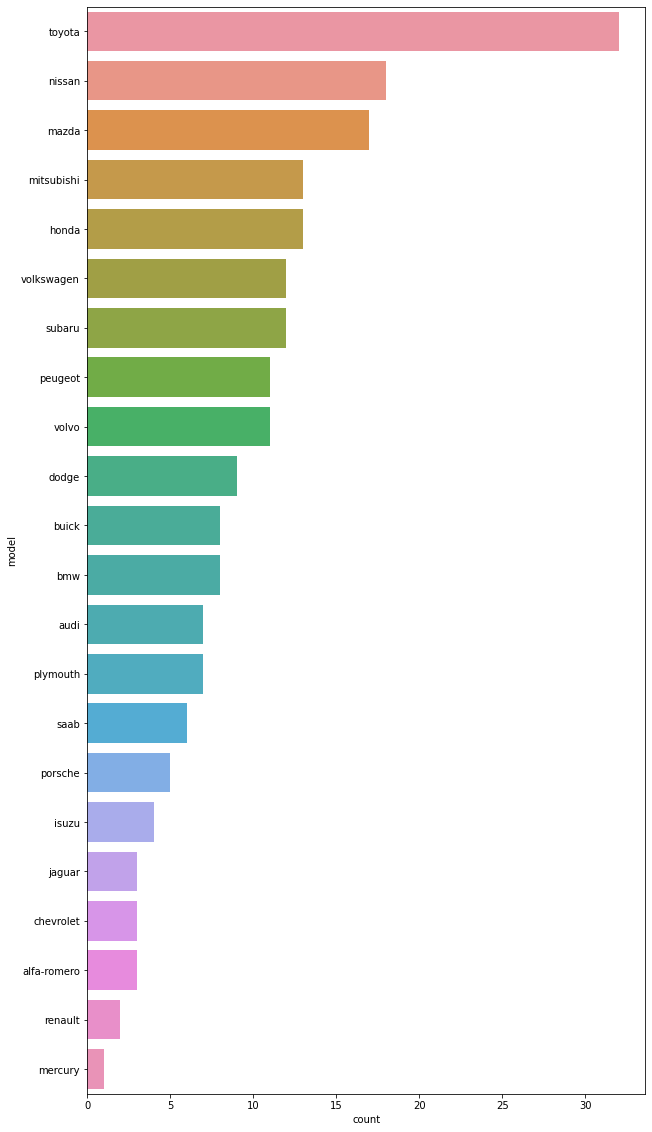

In [31]:
fig= plt.subplots(figsize=(10,20))
sns.countplot(data=bike, y="model",order = ['model'].value_counts().index)

In [ ]:
bike=bike.drop(['car_ID'],axis=1)

Text(0, 0.5, 'Count')

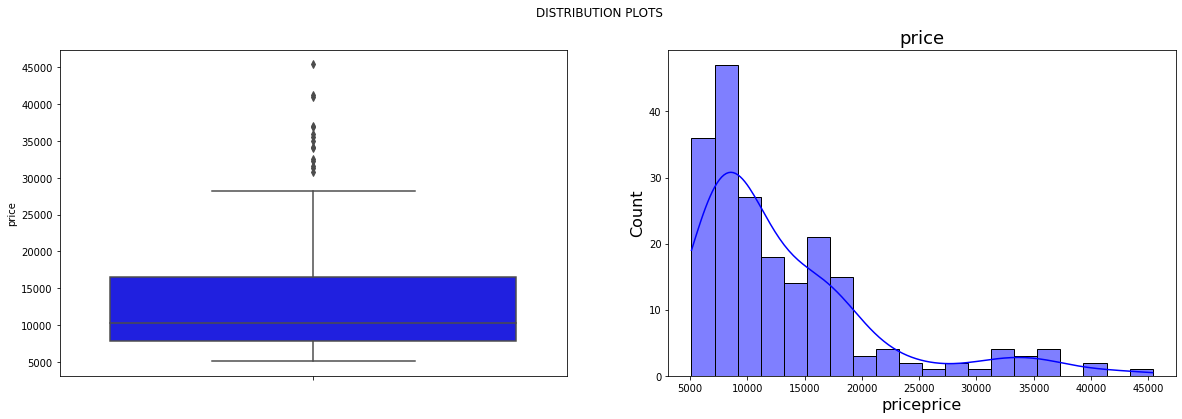

In [46]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
plt.suptitle('DISTRIBUTION PLOTS')
sns.boxplot(data = bike ,y=bike['price'], color='blue',ax=ax[0]) #price
plt.title('price', fontsize=18)
plt.ylabel('price', fontsize=16)
sns.histplot(bike['price'], kde=True, color='blue', bins=20,ax=ax[1])#price
plt.title('price', fontsize=18)
plt.xlabel('priceprice', fontsize=16)
plt.ylabel('Count', fontsize=16)

In [47]:
import scipy.stats as scs

In [70]:
y_t,fitted_lambda = stats.boxcox(sugar1)

In [80]:
h = bike['horsepower']

In [86]:
h_t,fitted_lambda = stats.boxcox(h)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: -0.6280809555716815


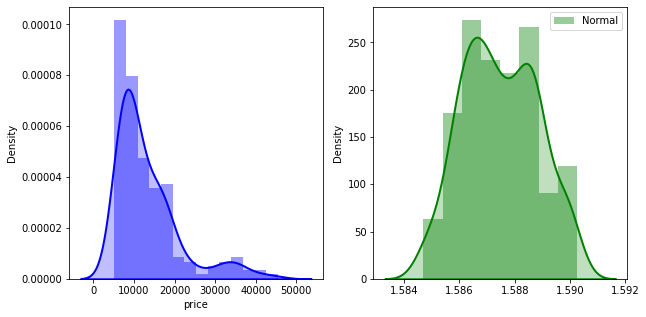

In [55]:
sugar1 = bike['price']
  
# transform training data & save lambda value
fitted_data, fitted_lambda = scs.boxcox(sugar1)
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(sugar1, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="", ax = ax[0])
  
sns.distplot(fitted_data, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [56]:
bike

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,model
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


<AxesSubplot:xlabel='carwidth'>

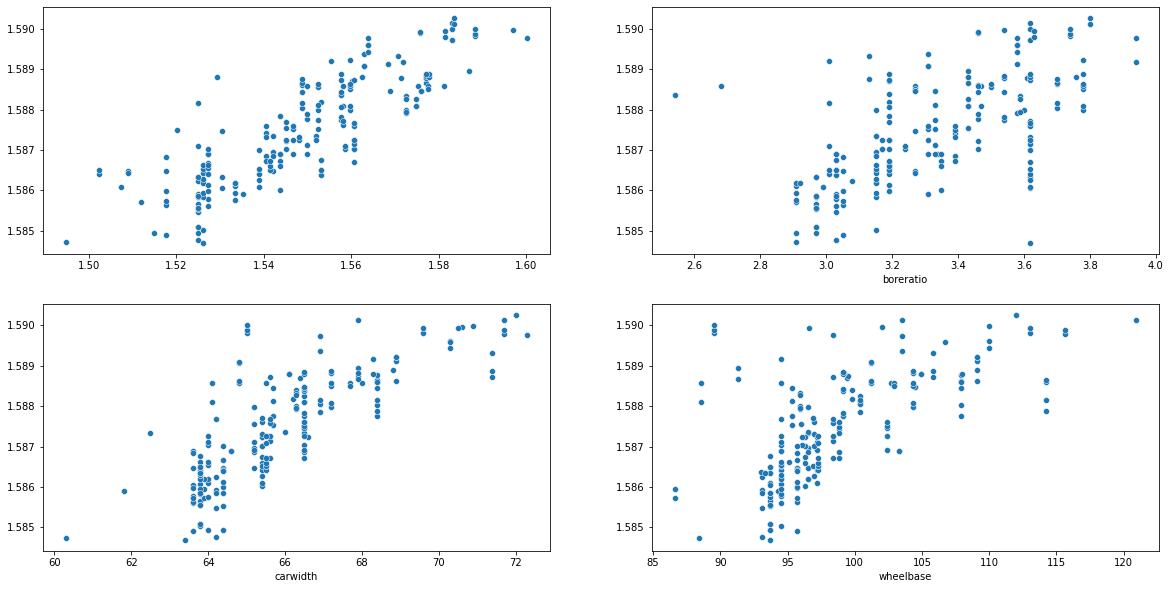

In [87]:
fig, ax = plt.subplots(figsize=(20,10), nrows=2, ncols=2)
sns.scatterplot(data=bike, x=h_t,y=y_t, ax=ax[0,0])
sns.scatterplot(data=bike, x="boreratio",y=y_t, ax=ax[0,1])
sns.scatterplot(data=bike, x="wheelbase",y=y_t, ax=ax[1,1])
sns.scatterplot(data=bike, x="carwidth",y=y_t, ax=ax[1,0])

In [74]:
y=bike['price']

<AxesSubplot:xlabel='carwidth', ylabel='price'>

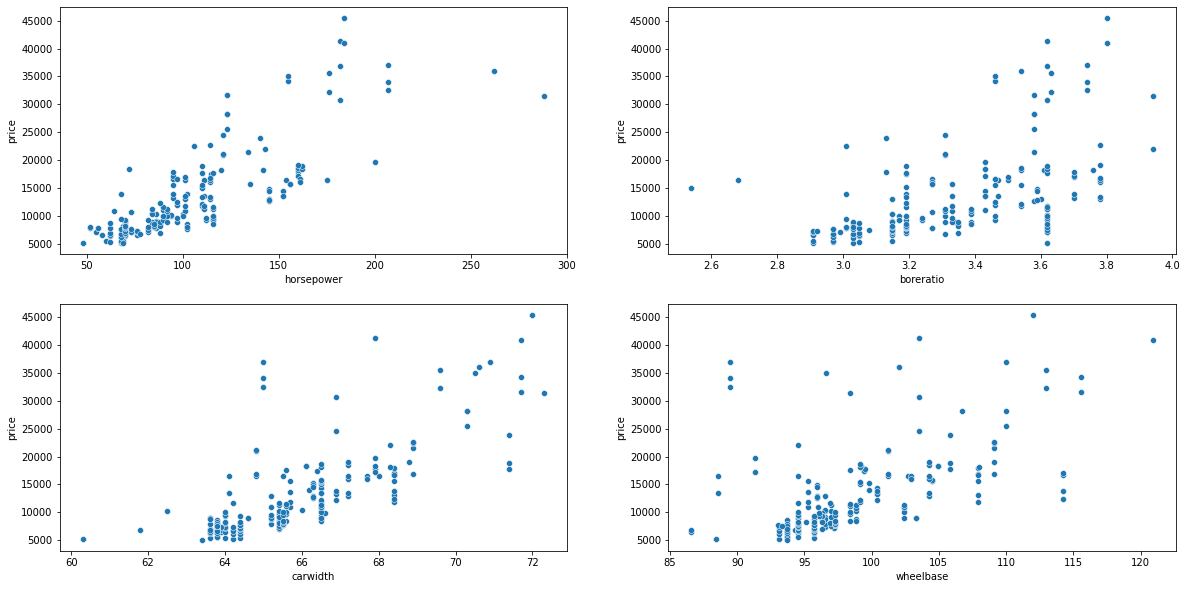

In [75]:
fig, ax = plt.subplots(figsize=(20,10), nrows=2, ncols=2)
sns.scatterplot(data=bike, x="horsepower",y=y, ax=ax[0,0])
sns.scatterplot(data=bike, x="boreratio",y=y, ax=ax[0,1])
sns.scatterplot(data=bike, x="wheelbase",y=y, ax=ax[1,1])
sns.scatterplot(data=bike, x="carwidth",y=y, ax=ax[1,0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


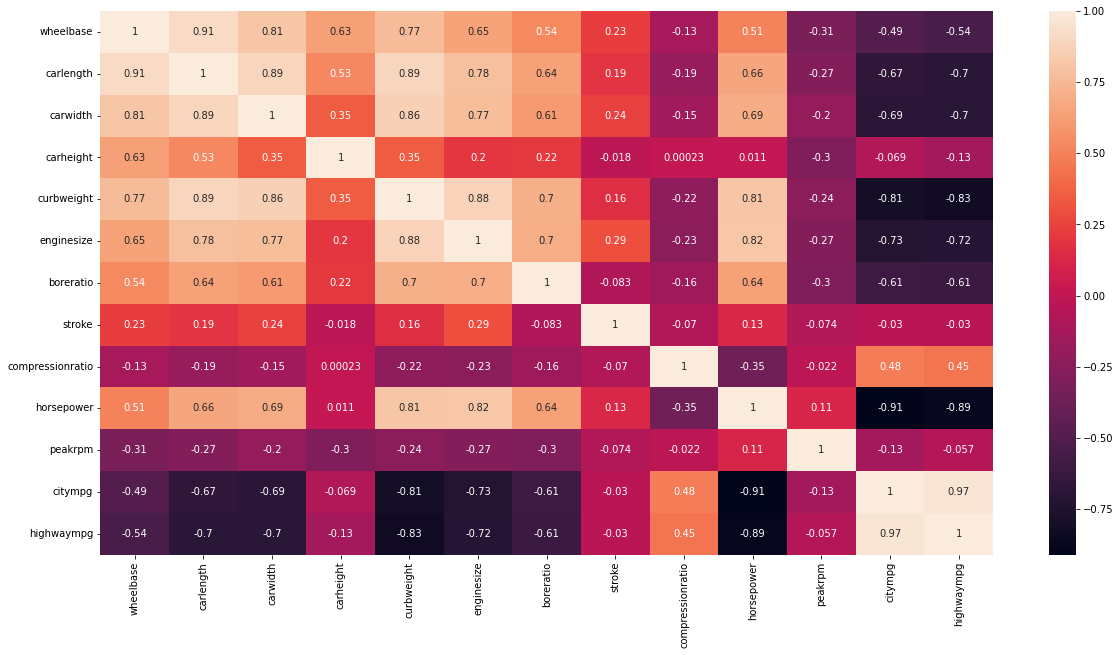

In [90]:
bike_1 = bike.drop("price",1)
corr = bike_1.corr(method = 'spearman')#without target varriable
fig= plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot = True)

plt.show()